# Задание лабораторной работы

- Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  - масштабирование признаков (не менее чем тремя способами);
  - обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
  - обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
  - отбор признаков:
    - один метод из группы методов фильтрации (filter methods);
    - один метод из группы методов обертывания (wrapper methods);
    - один метод из группы методов вложений (embedded methods).

# Выполнение работы

## Текстовое описание датасета

В качестве данных для анализа используется датасет `AutoRu1.csv`, представляющий собой таблицу, содержащую информацию о проданных автомобилях на сайте auto.ru за определенный период.

Для анализа в ЛР используются не все признаки.

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import scipy.stats as stats


## Подключение Google Диска для работы с Google Colab

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

## Чтение данных

In [3]:
data = pd.read_csv('../data/zomato.csv')

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.shape

(51717, 17)

In [6]:
len(data['listed_in(type)'].unique())

7

## Первичная обработка данных

Оставим в исходной выборке лишь некоторые признаки:

In [7]:
data.drop(['url', 'address', 'name', 'votes', 'phone', 'reviews_list', 'dish_liked'], inplace=True, axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51717 non-null  object
 1   book_table                   51717 non-null  object
 2   rate                         43942 non-null  object
 3   location                     51696 non-null  object
 4   rest_type                    51490 non-null  object
 5   cuisines                     51672 non-null  object
 6   approx_cost(for two people)  51371 non-null  object
 7   menu_item                    51717 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: object(10)
memory usage: 3.9+ MB


Удалим пропуски:

In [9]:
for column in data.columns:
  if (data[column].isnull().sum() != 0):
    print(column,':',data[column].isnull().sum())

rate : 7775
location : 21
rest_type : 227
cuisines : 45
approx_cost(for two people) : 346


In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

online_order                   0
book_table                     0
rate                           0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [12]:
data.shape

(43533, 10)

### Обработка строкового представления числа

In [13]:
import re

rate_p = '[\d]+([.,][\d]+)?'
def parse_rate(s):
    if isinstance(s, str) and re.search(rate_p, s) is not None:
        for catch in re.finditer(rate_p, s):
            return int(float(catch[0].replace(',', '.')) * 10)
    else:
        return None
      

coast_p = '[\d]+([.,][\d]+)?'
def parse_coast(s):
    if isinstance(s, str) and re.search(coast_p, s) is not None:
        for catch in re.finditer(coast_p, s):
            return int(catch[0].replace(',', ''))
    else:
        return None

data['rate'] = data['rate'].apply(parse_rate)
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(parse_coast)

# Если остались наны
data = data.dropna()

data['rate'] = data['rate'].astype('int64')
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype('int64')

data['menu_item'] = data['menu_item'].apply(lambda x: len(x)).astype('int64')

Закодируем признаки:

LabelEncoder

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
letype = LabelEncoder()
learrtype = letype.fit_transform(data["listed_in(type)"])
data["listed_in(type)"] = learrtype
data = data.astype({"listed_in(type)":"int64"})

In [16]:
leeng = LabelEncoder()
learren = leeng.fit_transform(data["rest_type"])
data["rest_type"] = learren
data = data.astype({"rest_type":"int64"})

In [17]:
lecuisines = LabelEncoder()
learrm = lecuisines.fit_transform(data["cuisines"])
data["cuisines"] = learrm
data = data.astype({"cuisines":"int64"})

In [18]:
lelocation = LabelEncoder()
learrm = lelocation.fit_transform(data["location"])
data["location"] = learrm
data = data.astype({"location":"int64"})

In [19]:
lelc = LabelEncoder()
learrm = lelc.fit_transform(data["listed_in(city)"])
data["listed_in(city)"] = learrm
data = data.astype({"listed_in(city)":"int64"})

## CountEncoder

In [20]:
# !pip install category_encoders

In [21]:
from category_encoders.count import CountEncoder as ce_CountEncoder

In [22]:
ce_CountEncoder1 = ce_CountEncoder()
data["online_order"] = ce_CountEncoder1.fit_transform(data['online_order'])

### FrequencyEncoder

In [23]:
ce_CountEncoder3 = ce_CountEncoder(normalize=True)
data["book_table"] = ce_CountEncoder3.fit_transform(data['book_table'])

In [24]:
data.head()

,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,27102,0.152776,41,1,24,1894,800,2,0,1
1,27102,0.847224,41,1,24,816,800,2,0,1
2,27102,0.847224,38,1,19,653,800,2,0,1
3,14161,0.847224,37,1,73,2221,300,2,0,1
4,14161,0.847224,38,4,24,1921,600,2,0,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 41263 non-null  int64  
 1   book_table                   41263 non-null  float64
 2   rate                         41263 non-null  int64  
 3   location                     41263 non-null  int64  
 4   rest_type                    41263 non-null  int64  
 5   cuisines                     41263 non-null  int64  
 6   approx_cost(for two people)  41263 non-null  int64  
 7   menu_item                    41263 non-null  int64  
 8   listed_in(type)              41263 non-null  int64  
 9   listed_in(city)              41263 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


In [26]:
data.dtypes

online_order                     int64
book_table                     float64
rate                             int64
location                         int64
rest_type                        int64
cuisines                         int64
approx_cost(for two people)      int64
menu_item                        int64
listed_in(type)                  int64
listed_in(city)                  int64
dtype: object

## Разделение выборки

In [27]:
data.describe()

,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
count,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000
mean,22660.793568,0.741129,37.020115,35.715096,45.289727,1208.839129,603.914063,668.438213,2.806946,14.254538
std,6144.123431,0.249846,4.399848,26.406399,26.085202,670.720623,464.942973,1467.678594,1.170420,8.277449
min,14161.000000,0.152776,18.000000,0.000000,0.000000,0.000000,40.000000,2.000000,0.000000,0.000000
25%,14161.000000,0.847224,34.000000,12.000000,24.000000,590.000000,300.000000,2.000000,2.000000,7.000000
50%,27102.000000,0.847224,37.000000,31.000000,37.000000,1255.000000,500.000000,2.000000,2.000000,15.000000
75%,27102.000000,0.847224,40.000000,54.000000,73.000000,1700.000000,750.000000,409.000000,4.000000,20.000000
max,27102.000000,0.847224,49.000000,91.000000,86.000000,2366.000000,6000.000000,24832.000000,6.000000,29.000000


В качестве целевого признака возьмем признак `rate`.

In [28]:
# DataFrame не содержащий целевой признак
Y = data['rate']
X_ALL = data.drop('rate', axis=1)

In [29]:
X_ALL

,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,27102,0.152776,1,24,1894,800,2,0,1
1,27102,0.847224,1,24,816,800,2,0,1
2,27102,0.847224,1,19,653,800,2,0,1
3,14161,0.847224,1,73,2221,300,2,0,1
4,14161,0.847224,4,24,1921,600,2,0,1
...,...,...,...,...,...,...,...,...,...
51709,14161,0.847224,88,25,1785,800,2,6,29
51711,14161,0.847224,88,25,101,800,2,6,29
51712,14161,0.847224,88,6,866,1500,2,6,29
51715,14161,0.152776,26,6,1207,2500,2,6,29


In [30]:
Y

0        41
1        41
2        38
3        37
4        38
         ..
51709    37
51711    25
51712    36
51715    43
51716    34
Name: rate, Length: 41263, dtype: int64

In [31]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [32]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['rate'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((33010, 9), (8253, 9))

## Масштабирование признаков

### Масштабирование на основе Z-оценки

In [33]:
x_col_list = ['approx_cost(for two people)', 'cuisines', 'rest_type']

In [34]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,0.722847,-2.354894,-1.314663,-0.816171,1.021542,0.421747,-0.454082,-2.398267,-1.601302
1,0.722847,0.424648,-1.314663,-0.816171,-0.585704,0.421747,-0.454082,-2.398267,-1.601302
2,0.722847,0.424648,-1.314663,-1.007853,-0.828729,0.421747,-0.454082,-2.398267,-1.601302
3,-1.383419,0.424648,-1.314663,1.062311,1.509083,-0.653667,-0.454082,-2.398267,-1.601302
4,-1.383419,0.424648,-1.201053,-0.816171,1.061798,-0.008418,-0.454082,-2.398267,-1.601302
...,...,...,...,...,...,...,...,...,...
41258,-1.383419,0.424648,1.980033,-0.777835,0.859028,0.421747,-0.454082,2.728160,1.781423
41259,-1.383419,0.424648,1.980033,-0.777835,-1.651735,0.421747,-0.454082,2.728160,1.781423
41260,-1.383419,0.424648,1.980033,-1.506226,-0.511157,1.927326,-0.454082,2.728160,1.781423
41261,-1.383419,-2.354894,-0.367911,-1.506226,-0.002742,4.078154,-0.454082,2.728160,1.781423


In [35]:
data_cs11_scaled.describe()

,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
count,4.126300e+04,4.126300e+04,4.126300e+04,4.126300e+04,4.126300e+04,4.126300e+04,4.126300e+04,4.126300e+04,4.126300e+04
mean,-7.419485e-15,-1.037194e-14,3.465485e-14,1.616906e-15,-4.776935e-16,-2.669066e-15,1.197844e-14,-6.791617e-15,7.446222e-14
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.383419e+00,-2.354894e+00,-1.352533e+00,-1.736244e+00,-1.802321e+00,-1.212882e+00,-4.540819e-01,-2.398267e+00,-1.722114e+00
25%,-1.383419e+00,4.246475e-01,-8.980923e-01,-8.161710e-01,-9.226593e-01,-6.536667e-01,-4.540819e-01,-6.894579e-01,-8.764326e-01
50%,7.228468e-01,4.246475e-01,-1.785610e-01,-3.177981e-01,6.882363e-02,-2.235012e-01,-4.540819e-01,-6.894579e-01,9.006049e-02
75%,7.228468e-01,4.246475e-01,6.924506e-01,1.062311e+00,7.322972e-01,3.142056e-01,-1.767699e-01,1.019351e+00,6.941187e-01
max,7.228468e-01,4.246475e-01,2.093643e+00,1.560684e+00,1.725271e+00,1.160605e+01,1.646400e+01,2.728160e+00,1.781423e+00


Построим плотность распределения:

In [36]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

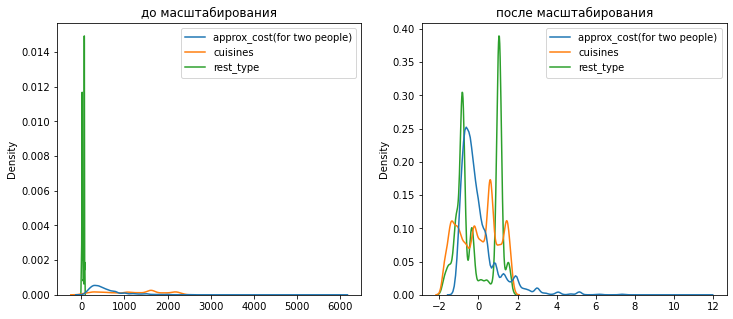

In [37]:
draw_kde(x_col_list, data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

Обучаем StandardScaler на обучающей выборке и масштабируем обучающую и тестовую выборки:

In [38]:
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [39]:
data_cs12_scaled_train.describe()

,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
count,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04
mean,-1.326590e-15,2.584993e-16,8.811828e-17,-4.397506e-17,-9.972668e-17,-1.018735e-15,1.491398e-15,-5.940164e-16,-1.602273e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.382830e+00,-2.368809e+00,-1.355221e+00,-1.732957e+00,-1.794476e+00,-1.212742e+00,-4.541267e-01,-2.394130e+00,-1.725648e+00
25%,-1.382830e+00,4.221531e-01,-8.916524e-01,-8.126818e-01,-9.191788e-01,-6.515972e-01,-4.541267e-01,-6.894593e-01,-8.788154e-01
50%,7.231547e-01,4.221531e-01,-1.821086e-01,-3.141996e-01,6.106488e-02,-2.199476e-01,-4.541267e-01,-6.894593e-01,8.899308e-02
75%,7.231547e-01,4.221531e-01,6.882650e-01,1.066213e+00,7.361454e-01,2.117020e-01,-1.802842e-01,1.015211e+00,6.938734e-01
max,7.231547e-01,4.221531e-01,2.088431e+00,1.564695e+00,1.727554e+00,1.165042e+01,8.848344e+00,2.719881e+00,1.782658e+00


In [40]:
data_cs12_scaled_test.describe()

,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
count,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000
mean,0.002021,-0.021195,-0.018391,0.018340,0.025013,0.021623,-0.000744,-0.008355,-0.005950
std,0.999392,1.020263,0.996258,1.001023,0.991899,1.017010,0.998914,0.987863,1.006833
min,-1.382830,-2.368809,-1.355221,-1.732957,-1.794476,-1.212742,-0.454127,-2.394130,-1.725648
25%,-1.382830,0.422153,-0.901113,-0.812682,-0.901316,-0.651597,-0.454127,-0.689459,-0.878815
50%,0.723155,0.422153,-0.182109,-0.314200,0.133262,-0.219948,-0.454127,-0.689459,0.088993
75%,0.723155,0.422153,0.688265,1.066213,0.736145,0.319614,-0.138731,1.015211,0.693873
max,0.723155,0.422153,2.088431,1.564695,1.727554,8.413044,16.460075,2.719881,1.782658


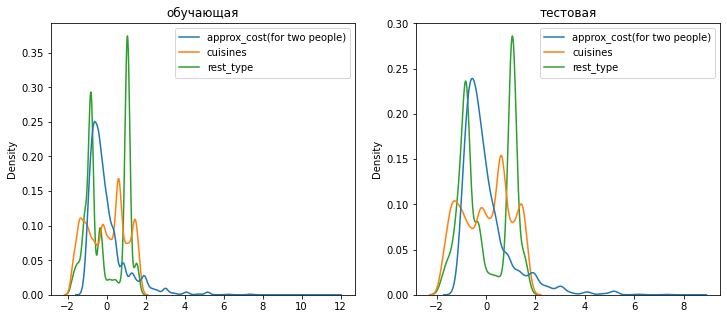

In [41]:
draw_kde(x_col_list, data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

### Масштабирование Mean Normalization

In [42]:
class MeanNormalisation:

    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled

    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [43]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
count,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000
mean,0.000192,-0.001519,-0.001068,0.001112,0.001420,0.000336,-0.000016,-0.000327,-0.000339
std,0.474780,0.359776,0.290180,0.303316,0.283483,0.078011,0.107475,0.195070,0.285429
min,-0.656619,-0.848743,-0.393542,-0.525512,-0.509501,-0.094280,-0.048818,-0.468151,-0.491875
25%,-0.656619,0.151257,-0.261674,-0.246443,-0.260135,-0.050656,-0.048818,-0.134818,-0.250496
50%,0.343381,0.151257,-0.052882,-0.095280,0.020931,-0.017099,-0.048818,-0.134818,0.025366
75%,0.343381,0.151257,0.199865,0.323325,0.209012,0.024847,-0.019014,0.198516,0.197780
max,0.343381,0.151257,0.606458,0.474488,0.490499,0.905720,1.769431,0.531849,0.508125


In [44]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [45]:
data_cs22_scaled_train.describe()

,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
count,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04,3.301000e+04
mean,-4.283221e-16,-5.499503e-13,5.077479e-17,-6.701656e-17,2.766729e-18,-3.997169e-17,-1.368482e-16,7.105860e-17,-1.272670e-17
std,4.748445e-01,3.583048e-01,2.903938e-01,3.032507e-01,2.839315e-01,7.774259e-02,1.075000e-01,1.955442e-01,2.850422e-01
min,-6.566192e-01,-8.487428e-01,-3.935418e-01,-5.255124e-01,-5.095006e-01,-9.428024e-02,-4.881786e-02,-4.681511e-01,-4.918750e-01
25%,-6.566192e-01,1.512572e-01,-2.589264e-01,-2.464426e-01,-2.609799e-01,-5.065608e-02,-4.881786e-02,-1.348177e-01,-2.504957e-01
50%,3.433808e-01,1.512572e-01,-5.288241e-02,-9.527980e-02,1.733798e-02,-1.709903e-02,-4.881786e-02,-1.348177e-01,2.536640e-02
75%,3.433808e-01,1.512572e-01,1.998648e-01,3.233249e-01,2.090117e-01,1.645801e-02,-1.938025e-02,1.985156e-01,1.977802e-01
max,3.433808e-01,1.512572e-01,6.064582e-01,4.744876e-01,4.904994e-01,9.057198e-01,9.511821e-01,5.318489e-01,5.081250e-01


In [46]:
data_cs22_scaled_test.describe()

,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
count,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000
mean,0.000960,-0.007594,-0.005341,0.005562,0.007102,0.001681,-0.000080,-0.001634,-0.001696
std,0.474548,0.365560,0.289303,0.303556,0.281627,0.079064,0.107382,0.193168,0.286986
min,-0.656619,-0.848743,-0.393542,-0.525512,-0.509501,-0.094280,-0.048818,-0.468151,-0.491875
25%,-0.656619,0.151257,-0.261674,-0.246443,-0.255908,-0.050656,-0.048818,-0.134818,-0.250496
50%,0.343381,0.151257,-0.052882,-0.095280,0.037837,-0.017099,-0.048818,-0.134818,0.025366
75%,0.343381,0.151257,0.199865,0.323325,0.209012,0.024847,-0.014913,0.198516,0.197780
max,0.343381,0.151257,0.606458,0.474488,0.490499,0.654042,1.769431,0.531849,0.508125


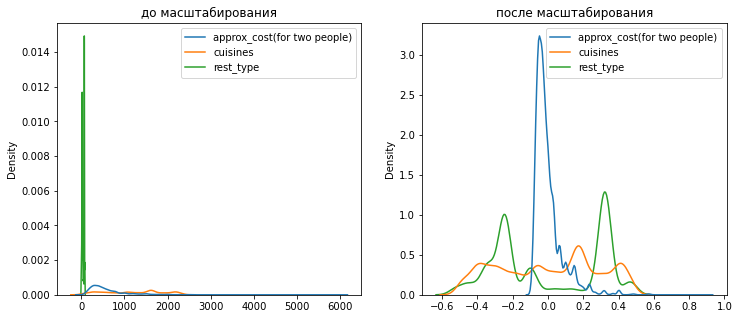

In [47]:
draw_kde(x_col_list, data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

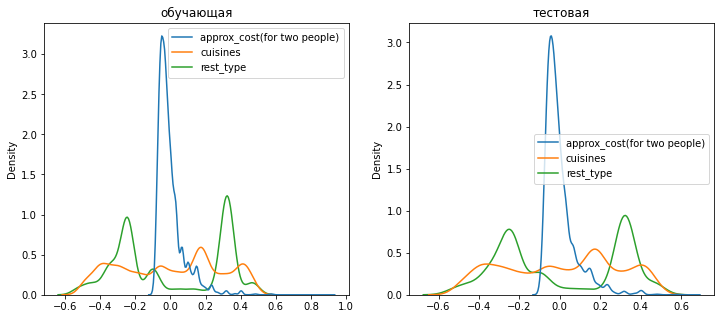

In [48]:
draw_kde(x_col_list, data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

### MinMax масштабирование

In [49]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
count,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000
mean,0.656811,0.847224,0.392474,0.526625,0.510921,0.094616,0.026840,0.467824,0.491536
std,0.474780,0.359776,0.290180,0.303316,0.283483,0.078011,0.059109,0.195070,0.285429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.131868,0.279070,0.249366,0.043624,0.000000,0.333333,0.241379
50%,1.000000,1.000000,0.340659,0.430233,0.530431,0.077181,0.000000,0.333333,0.517241
75%,1.000000,1.000000,0.593407,0.848837,0.718512,0.119128,0.016391,0.666667,0.689655
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

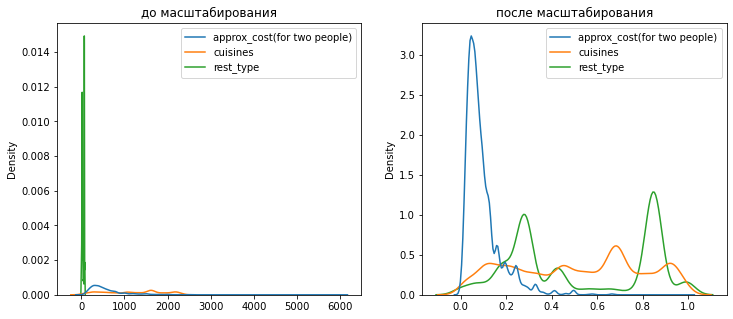

In [51]:
draw_kde(x_col_list, data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

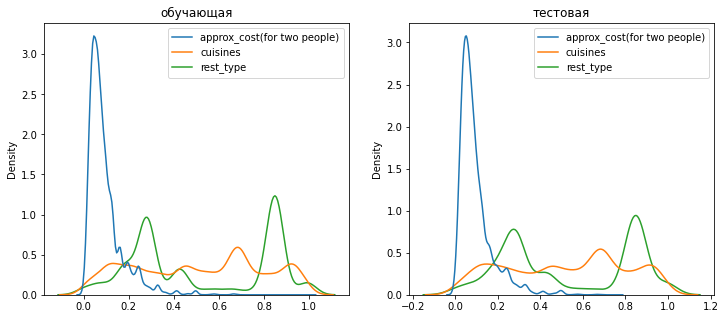

In [52]:
draw_kde(x_col_list, data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

## Обработка выбросов

In [53]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

In [54]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [55]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')

    return lower_boundary, upper_boundary

### Удаление выбросов

Воспользуемся методом OutlierBoundaryType.SIGMA:

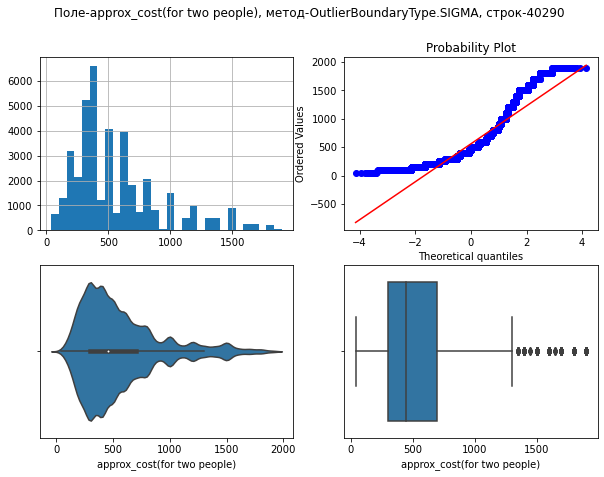

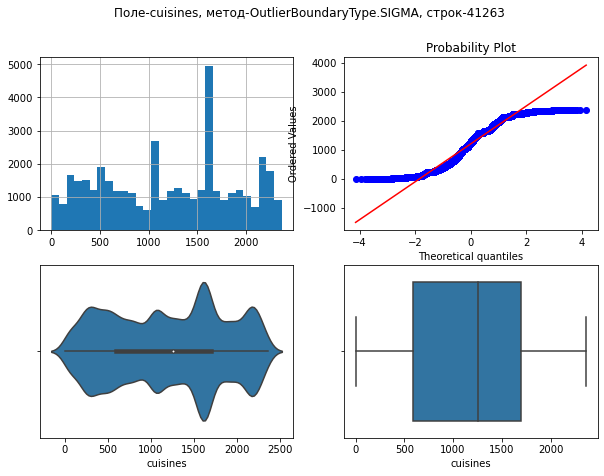

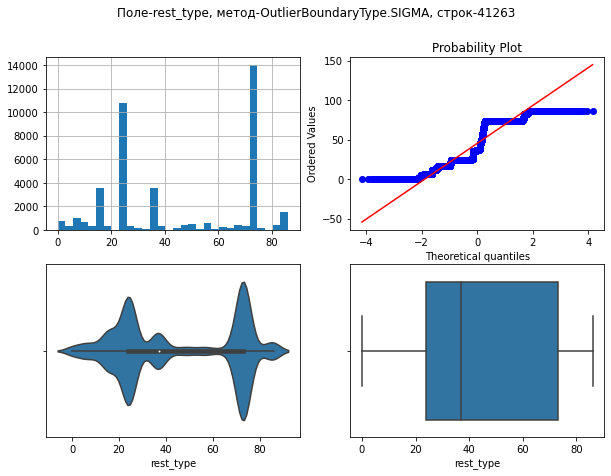

In [56]:
for col in x_col_list:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, OutlierBoundaryType.SIGMA)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True,
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, OutlierBoundaryType.SIGMA, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

### Замена выбросов

Проведём замену выбросов с помощью метода OutlierBoundaryType.SIGMA:

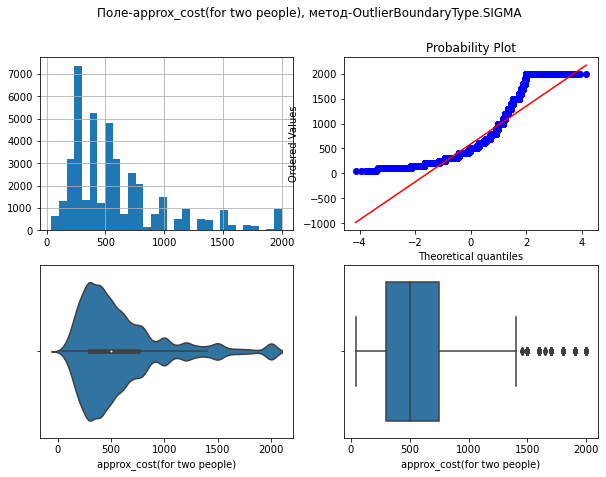

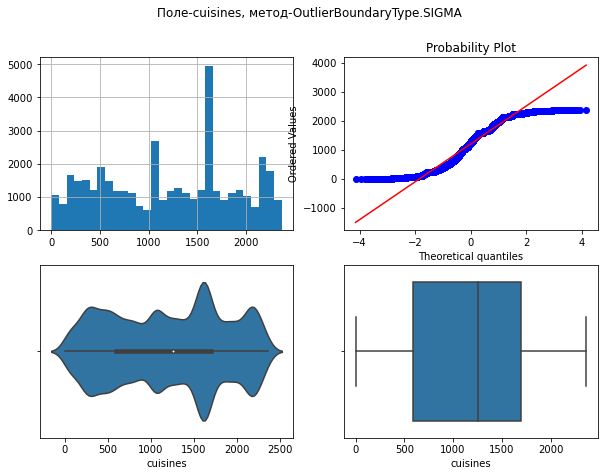

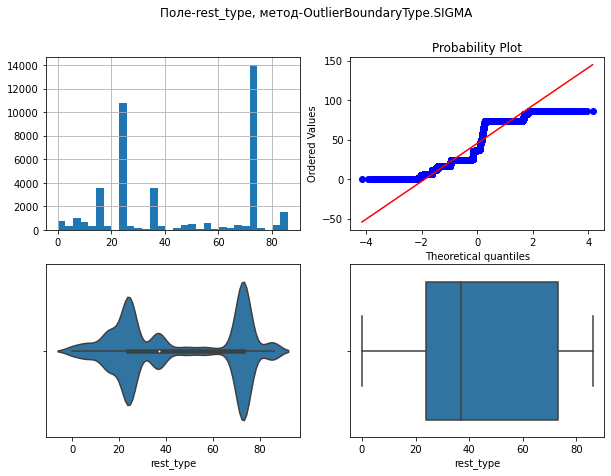

In [57]:
for col in x_col_list:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, OutlierBoundaryType.SIGMA)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary,
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, OutlierBoundaryType.SIGMA)
        diagnostic_plots(data, col, title)

## Отбор признаков

### Метод фильтрации (filter)

Воспользуемся методом "Удаление константных и псевдоконстантных (почти константных) признаков".

In [58]:
len(data['menu_item'].unique())

4313

С помощью VarianceThreshold попробуем обнаружить больше таких признаков:

In [59]:
from sklearn.feature_selection import VarianceThreshold

In [60]:
selector = VarianceThreshold(threshold=0.15)
selector.fit(data)
# Значения дисперсий для каждого признака
selector.variances_

array([3.77493379e+07, 6.24213032e-02, 1.93581975e+01, 6.97281019e+02,
       6.80421281e+02, 4.49855252e+05, 1.72655069e+05, 2.15402825e+06,
       1.36985021e+00, 6.85144945e+01])

Удалим константные и псевдоконстантные признаки:

In [61]:
selector.transform(data)

array([[2.7102e+04, 4.1000e+01, 1.0000e+00, ..., 2.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.7102e+04, 4.1000e+01, 1.0000e+00, ..., 2.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.7102e+04, 3.8000e+01, 1.0000e+00, ..., 2.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.4161e+04, 3.6000e+01, 8.8000e+01, ..., 2.0000e+00, 6.0000e+00,
        2.9000e+01],
       [1.4161e+04, 4.3000e+01, 2.6000e+01, ..., 2.0000e+00, 6.0000e+00,
        2.9000e+01],
       [1.4161e+04, 3.4000e+01, 2.6000e+01, ..., 2.0000e+00, 6.0000e+00,
        2.9000e+01]])

### Метод обертывания (wrapper)

Будем использовать алгоритм полного перебора.

In [62]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [64]:
efs1 = EFS(knn,
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=4)

efs1 = efs1.fit(X_train, y_train)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 246/246

Best accuracy score: 0.65
Best subset (indices): (2, 3, 4, 5)
Best subset (corresponding names): ('location', 'rest_type', 'cuisines', 'approx_cost(for two people)')


Набор очень большой, применять данный метод к нему очень трудозатратно, ядро не справляется.

### Метод вложений (embedded)

Применим линейную регрессию:

In [65]:
from sklearn.linear_model import Lasso

In [66]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X_train, y_train)
# Коэффициенты регрессии
list(zip(data.columns.tolist(), e_ls1.coef_))

[('online_order', 9.587560889424847e-05),
 ('book_table', -0.0),
 ('rate', 0.0035244206406411494),
 ('location', -0.013149794651649695),
 ('rest_type', -0.0002633022938218233),
 ('cuisines', 0.003541090138488024),
 ('approx_cost(for two people)', 2.1329815051364655e-05),
 ('menu_item', 0.0),
 ('listed_in(type)', -0.0)]

In [67]:
from sklearn.feature_selection import SelectFromModel

In [68]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X_train, y_train)
list(zip(data.columns.tolist(), sel_e_ls1.get_support()))

[('online_order', True),
 ('book_table', False),
 ('rate', True),
 ('location', True),
 ('rest_type', True),
 ('cuisines', True),
 ('approx_cost(for two people)', True),
 ('menu_item', False),
 ('listed_in(type)', False)]